In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [82]:
title = ['Id', 'Title', 'Url','Publisher','Category','Story','Hostname','Timestamp']

In [83]:
df = pd.read_csv('newsCorpora.csv', sep = '\t', names = title)

In [84]:
df.head(n = 3)

,Id,Title,Url,Publisher,Category,Story,Hostname,Timestamp
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550


In [85]:
df.Category.value_counts()

e    152469
b    115967
t    108344
m     45639
Name: Category, dtype: int64

#### Applying proper category names

In [86]:
def category_apply(c):
    if c == 'b':
        return 'Business'
    elif c == 'e':
        return 'Entertainment'
    elif c == 't':
        return 'Science and Tech'
    elif c == 'm':
        return 'Health'
df['Category'] = df.Category.map(category_apply)

In [87]:
df.sample(n= 2)

,Id,Title,Url,Publisher,Category,Story,Hostname,Timestamp
241986,242432,VIDEO: Kim Kardashian Goes Sightseeing During ...,http://news.ftcpublications.com/2014/05/video-...,FTC Publications,Entertainment,dkqOgAdP5yFwphMz5qRS4cwe8CioM,news.ftcpublications.com,1400869114078
203894,204330,ICAO mounts industry response on calls for glo...,http://www.airtrafficmanagement.net/2014/05/ic...,Air Traffic Management,Business,d1Z3uyPH3pgRsJM5D_is4lw-Nt3pM,www.airtrafficmanagement.net,1399907158514


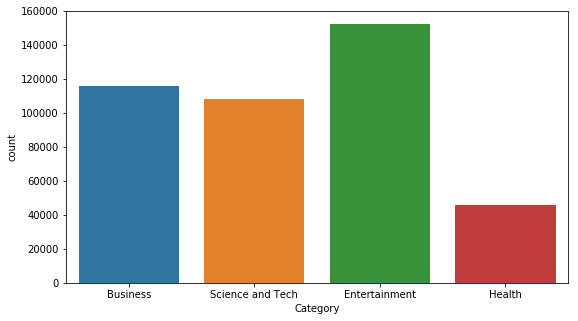

In [88]:
plt.figure(figsize = (9,5))
sns.countplot(x = df['Category'])

In [78]:
df.isnull().sum()

Id           0
Title        0
Url          0
Publisher    2
Category     0
Story        0
Hostname     0
Timestamp    0
dtype: int64

#### Removing the punctuations from Title

In [95]:
def remove_punctuation(string):
    without_punctuation = re.sub('[^A-Za-z0-9]+',' ',string)
    return without_punctuation 
df['Title'] = df.Title.map(remove_punctuation)
    

In [106]:
cv = CountVectorizer(stop_words = 'english')

In [113]:
feature = df['Title']
target = df['Category']

In [114]:
trainX,testX, trainY, testY = train_test_split(feature, target)

In [107]:
train = cv.fit_transform(df['Title'])

#### Making pipeline